In [4]:
import os
import pandas as pd
import spacy
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

dir_texts = 'corpus'

nlp = spacy.load('en_core_web_sm')

files = [f for f in os.listdir(dir_texts) if not f.startswith('.')]
corpus = []

for filename in files:
    author, title = filename[:-4].split('_', 1)
    path = os.path.join('corpus', filename)
    print(path, end='...')
    with open(path) as f:
        fulltext = f.read()
        doc = nlp(fulltext)
        print(len(doc), 'tokens')
        corpus.append(dict(
            author = author,
            title = title,
            token = [tok for tok in doc],
        ))
corpus = pd.DataFrame(corpus)
display(corpus)

corpus/nesbit_from_the_dead.txt...7004 tokens
corpus/doyle_the_man_with_the_twisted_lip.txt...12040 tokens
corpus/doyle_the_adventure_of_the_blue_carbuncle.txt...10482 tokens
corpus/nesbit_the_ebony_frame.txt...9501 tokens
corpus/nesbit_man-size_in_marble.txt...7041 tokens
corpus/doyle_the_adventure_of_the_speckled_band.txt...12756 tokens
corpus/doyle_the_adventure_of_the_noble_bachelor.txt...10728 tokens
corpus/nesbit_uncle_abraham’s_romance.txt...1693 tokens
corpus/doyle_a_scandal_in_bohemia.txt...11406 tokens
corpus/doyle_a_case_of_identity.txt...9106 tokens
corpus/nesbit_the_mass_for_the_dead.txt...4508 tokens
corpus/doyle_the_five_orange_pips.txt...9570 tokens
corpus/doyle_the_red-headed_league.txt...12054 tokens
corpus/nesbit_the_mystery_of_the_semi-detached.txt...1613 tokens
corpus/doyle_the_adventure_of_the_copper_beeches.txt...12861 tokens
corpus/doyle_the_boscombe_valley_mystery.txt...12434 tokens
corpus/doyle_the_adventure_of_the_engineer’s_thumb.txt...10796 tokens
corpus/do

,author,title,token
0,nesbit,from_the_dead,"[I., \n\n, "", But, true, or, not, true, ,, you..."
1,doyle,the_man_with_the_twisted_lip,"[Isa, Whitney, ,, brother, of, the, late, Elia..."
2,doyle,the_adventure_of_the_blue_carbuncle,"[I, had, called, upon, my, friend, Sherlock, H..."
3,nesbit,the_ebony_frame,"[To, be, rich, is, a, luxurious, sensation, --..."
4,nesbit,man-size_in_marble,"[Although, every, word, of, this, story, is, a..."
5,doyle,the_adventure_of_the_speckled_band,"[On, glancing, over, my, notes, of, the, seven..."
6,doyle,the_adventure_of_the_noble_bachelor,"[The, Lord, St., Simon, marriage, ,, and, its,..."
7,nesbit,uncle_abraham’s_romance,"["", No, ,, my, dear, ,, "", my, Uncle, Abraham,..."
8,doyle,a_scandal_in_bohemia,"[I., \n\n, To, Sherlock, Holmes, she, is, alwa..."
9,doyle,a_case_of_identity,"[“, My, dear, fellow, ,, ”, said, Sherlock, Ho..."


In [5]:
tokens = pd.DataFrame(corpus).explode('token', ignore_index=True)
display(tokens)

,author,title,token
0,nesbit,from_the_dead,I.
1,nesbit,from_the_dead,\n\n
2,nesbit,from_the_dead,""""
3,nesbit,from_the_dead,But
4,nesbit,from_the_dead,true
...,...,...,...
168113,doyle,the_adventure_of_the_beryl_coronet,sufficient
168114,doyle,the_adventure_of_the_beryl_coronet,\n
168115,doyle,the_adventure_of_the_beryl_coronet,punishment
168116,doyle,the_adventure_of_the_beryl_coronet,.


In [6]:
tokens['text'] = [tok.text for tok in tokens['token']]
tokens['lemma'] = [tok.lemma_ for tok in tokens['token']]
tokens['pos'] = [tok.pos_ for tok in tokens['token']]
display(tokens)

,author,title,token,text,lemma,pos
0,nesbit,from_the_dead,I.,I.,i.,NOUN
1,nesbit,from_the_dead,\n\n,\n\n,\n\n,SPACE
2,nesbit,from_the_dead,"""","""","""",PUNCT
3,nesbit,from_the_dead,But,But,but,CCONJ
4,nesbit,from_the_dead,true,true,true,ADJ
...,...,...,...,...,...,...
168113,doyle,the_adventure_of_the_beryl_coronet,sufficient,sufficient,sufficient,ADJ
168114,doyle,the_adventure_of_the_beryl_coronet,\n,\n,\n,SPACE
168115,doyle,the_adventure_of_the_beryl_coronet,punishment,punishment,punishment,NOUN
168116,doyle,the_adventure_of_the_beryl_coronet,.,.,.,PUNCT


In [7]:
tokens = tokens.loc[tokens.pos!='PUNCT']
tokens = tokens.loc[tokens.pos!='SPACE']
tokens = tokens.loc[tokens.pos!='PROPN']
tokens = tokens.loc[tokens.text.str.contains(r'[A-Za-z]')]
display(tokens)

,author,title,token,text,lemma,pos
0,nesbit,from_the_dead,I.,I.,i.,NOUN
3,nesbit,from_the_dead,But,But,but,CCONJ
4,nesbit,from_the_dead,true,true,true,ADJ
5,nesbit,from_the_dead,or,or,or,CCONJ
6,nesbit,from_the_dead,not,not,not,PART
...,...,...,...,...,...,...
168110,doyle,the_adventure_of_the_beryl_coronet,a,a,a,DET
168111,doyle,the_adventure_of_the_beryl_coronet,more,more,more,ADJ
168112,doyle,the_adventure_of_the_beryl_coronet,than,than,than,ADP
168113,doyle,the_adventure_of_the_beryl_coronet,sufficient,sufficient,sufficient,ADJ


In [8]:
pos_freq = pd.crosstab([tokens['author'], tokens['title']], tokens['pos'], normalize='index')*1000
display(pos_freq)

pos                                                 ADJ         ADP  \
author title                                                          
doyle  a_case_of_identity                     71.745562  109.467456   
       a_scandal_in_bohemia                   60.982973  118.946987   
       the_adventure_of_the_beryl_coronet     58.521776  106.574539   
       the_adventure_of_the_blue_carbuncle    61.028541  119.952650   
       the_adventure_of_the_copper_beeches    73.039520  114.318229   
       the_adventure_of_the_engineer’s_thumb  65.497930  114.317020   
       the_adventure_of_the_noble_bachelor    67.294057  112.414593   
       the_adventure_of_the_speckled_band     65.954578  119.776003   
       the_boscombe_valley_mystery            65.925847  112.618870   
       the_five_orange_pips                   57.090499  127.008740   
       the_man_with_the_twisted_lip           62.979860  121.286302   
       the_red-headed_league                  70.408163  113.832200   
nesbit from_the_dead                          59.532925   92.266462   
       man-size_in_marble                     75.892857  107.886905   
       the_ebony_frame                        60.801345  111.515831   
       the_mass_for_the_dead                  65.217391   97.238543   
       the_mystery_of_the_semi-detached       76.679842  108.300395   
       uncle_abraham’s_romance                67.315491   90.835361   

pos                                                 ADV        AUX      CCONJ  \
author title                                                                    
doyle  a_case_of_identity                     66.124260  78.402367  42.899408   
       a_scandal_in_bohemia                   58.084772  79.096727  40.333293   
       the_adventure_of_the_beryl_coronet     63.860972  88.044389  34.443049   
       the_adventure_of_the_blue_carbuncle    57.214258  78.916217  35.380771   
       the_adventure_of_the_copper_beeches    63.107801  84.523071  38.795779   
       the_adventure_of_the_engineer’s_thumb  64.889214  78.767957  39.444850   
       the_adventure_of_the_noble_bachelor    69.356710  82.119376  37.772335   
       the_adventure_of_the_speckled_band     56.932490  73.628539  36.814269   
       the_boscombe_valley_mystery            58.873811  86.654557  39.213591   
       the_five_orange_pips                   49.337468  79.644770  41.161545   
       the_man_with_the_twisted_lip           59.085345  78.224101  38.388784   
       the_red-headed_league                  63.038549  76.870748  41.383220   
nesbit from_the_dead                          62.787136  73.124043  43.836141   
       man-size_in_marble                     66.592262  76.078869  51.339286   
       the_ebony_frame                        53.656486  66.545251  41.328103   
       the_mass_for_the_dead                  49.353702  77.849589  51.997650   
       the_mystery_of_the_semi-detached       56.126482  70.355731  65.612648   
       uncle_abraham’s_romance                73.803731  71.370641  53.527981   

pos                                                  DET      INTJ  \
author title                                                         
doyle  a_case_of_identity                      94.526627  4.881657   
       a_scandal_in_bohemia                    97.693515  2.535926   
       the_adventure_of_the_beryl_coronet      88.149079  3.350084   
       the_adventure_of_the_blue_carbuncle    109.430488  7.102460   
       the_adventure_of_the_copper_beeches     93.213325  5.172771   
       the_adventure_of_the_engineer’s_thumb   99.464329  4.017531   
       the_adventure_of_the_noble_bachelor    101.070001  6.574707   
       the_adventure_of_the_speckled_band     107.331743  4.148087   
       the_boscombe_valley_mystery             99.049044  4.060263   
       the_five_orange_pips                   110.374965  2.960248   
       the_man_with_the_twisted_lip           104.261711  4.339602   
       the_red-headed_league                   9

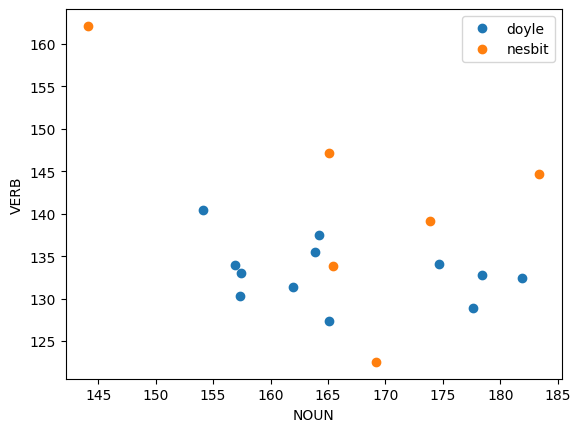

In [9]:
feat_x = 'NOUN'
feat_y = 'VERB'

fig, ax = plt.subplots()
authors = pos_freq.index.get_level_values(0)
for label, group in pos_freq.groupby(authors):
    ax.plot(group[feat_x], group[feat_y], marker='o', ls='', label=label)
    ax.set_xlabel(feat_x)
    ax.set_ylabel(feat_y)
    ax.legend()

In [10]:
tokens.groupby('lemma').agg(count=('token', 'count')).sort_values('count', ascending=False).iloc[:30]

,count
lemma,
the,6791
be,5515
I,4983
and,3905
to,3319
a,3129
of,3119
have,2441
in,2122


In [11]:
mfw = tokens.groupby('lemma').agg(count=('token', 'count')).sort_values('count', ascending=False).iloc[:100].index.values
print(mfw)

['the' 'be' 'I' 'and' 'to' 'a' 'of' 'have' 'in' 'he' 'it' 'that' 'you'
 'my' 'his' 'she' 'as' 'with' 'at' 'not' 'for' 'we' 'which' 'but' 'do'
 'say' 'there' 'from' 'on' 'this' 'so' 'see' 'one' 'her' 'all' 'come'
 'upon' 'no' 'what' 'your' 'they' 'very' 'then' 'when' 'would' 'by' 'out'
 'man' 'an' 'go' 'up' 'know' 'could' 'into' 'if' 'who' 'little' 'think'
 'will' 'well' 'now' 'some' '’s' 'our' 'down' 'hand' 'look' 'or' 'room'
 'take' 'make' 'can' 'should' 'tell' 'more' 'find' 'over' 'back' 'time'
 'before' 'may' 'about' 'hear' 'only' 'shall' 'other' 'good' 'than' 'door'
 'must' 'day' 'face' 'how' 'any' 'get' 'give' 'two' 'never' 'night'
 'house']


In [18]:
selected = tokens.lemma.isin(mfw)
lemma_count = pd.crosstab([tokens.loc[selected, 'author'],tokens.loc[selected, 'title']], tokens.loc[selected, 'lemma'])
display(lemma_count)

lemma                                           I    a  about  all  an  and  \
author title                                                                  
doyle  a_case_of_identity                     207  163     14   24  21  212   
       a_scandal_in_bohemia                   305  224      9   29  32  256   
       the_adventure_of_the_beryl_coronet     429  211     13   38  27  241   
       the_adventure_of_the_blue_carbuncle    231  208     15   21  19  200   
       the_adventure_of_the_copper_beeches    395  238     17   40  30  276   
       the_adventure_of_the_engineer’s_thumb  374  233     12   41  33  253   
       the_adventure_of_the_noble_bachelor    294  211     11   36  29  235   
       the_adventure_of_the_speckled_band     277  252     15   31  23  281   
       the_boscombe_valley_mystery            320  231     19   29  26  280   
       the_five_orange_pips                   211  149      8   32  19  232   
       the_man_with_the_twisted_lip           280  275     17   32  37  271   
       the_red-headed_league                  317  237     18   39  36  279   
nesbit from_the_dead                          403   94      4   15  17  181   
       man-size_in_marble                     242  106     14   28   7  232   
       the_ebony_frame                        403  164      7   33   9  222   
       the_mass_for_the_dead                  199   62      6   10   5  138   
       the_mystery_of_the_semi-detached         9   36      4    8   3   64   
       uncle_abraham’s_romance                 87   35      2    3   2   52   

lemma                                         any  as  at  back  ...  what  \
author title                                                     ...         
doyle  a_case_of_identity                      12  64  50     9  ...    23   
       a_scandal_in_bohemia                     4  60  62     9  ...    32   
       the_adventure_of_the_beryl_coronet      16  68  68    12  ...    43   
       the_adventure_of_the_blue_carbuncle      7  49  54    13  ...    32   
       the_adventure_of_the_copper_beeches     15  95  92    14  ...    36   
       the_adventure_of_the_engineer’s_thumb    9  63  75    14  ...    22   
       the_adventure_of_the_noble_bachelor     10  63  51    13  ...    31   
       the_adventure_of_the_speckled_band      16  65  78    12  ...    35   
       the_boscombe_valley_mystery              6  87  71    16  ...    37   
       the_five_orange_pips                     8  60  52     6  ...    28   
       the_man_with_the_twisted_lip            11  85  55    19  ...    28   
       the_red-headed_league                   14  93  61     6  ...    43   
nesbit from_the_dead                           12  41  38    20  ...    17   
       man-size_in_marble                      13  40  31    14  ...    22   
       the_ebony_frame                          9  63  47    22  ...    16   
       the_mass_for_the_dead                    6  24   6     6  ...     7   
       the_mystery_of_the_semi-detached         2   8   7     2  ...     3   
       uncle_abraham’s_romance                  6   4  17     3  ...     5   

lemma                                         when  which  who  will  with  \
author title                                                                 
doyle  a_case_of_identity                       26     47   12    13    62   
       a_scandal_in_bohemia                     31     55   30    34    68   
       the_adventure_of_the_beryl_coronet       40     62   32    27    91   
       the_adventure_of_the_blue_carbuncle      15     62   29    29    64   
       the_adventure_of_the_copper_beeches      23     75   29    20    84   
       the_adventure_of_the_engineer’s_thumb    30     68   20    16    46   
       the_adventure_of_the_noble_bachelor      25     41   17    26    55   
       the_adventure_of_the_speckled_band       29     96   15    16    79   
       the_boscombe_valley_mystery              30     70   24    21    67   


In [19]:
n_lemmas = tokens.groupby('title').agg(
    n=('lemma', 'count'),
    
)
lemma_freq = lemma_count.div(n_lemmas.n, axis=0) * 1000
display(lemma_freq)

lemma                                                 I          a     about  \
author title                                                                   
doyle  a_case_of_identity                     30.621302  24.112426  2.071006   
       a_scandal_in_bohemia                   36.831301  27.049873  1.086825   
       the_adventure_of_the_beryl_coronet     44.912060  22.089615  1.360972   
       the_adventure_of_the_blue_carbuncle    30.382744  27.357622  1.972905   
       the_adventure_of_the_copper_beeches    40.864887  24.622388  1.758742   
       the_adventure_of_the_engineer’s_thumb  45.532019  28.366204  1.460920   
       the_adventure_of_the_noble_bachelor    37.901250  27.201238  1.418074   
       the_adventure_of_the_speckled_band     28.725500  26.132946  1.555533   
       the_boscombe_valley_mystery            34.191687  24.682124  2.030131   
       the_five_orange_pips                   29.743445  21.003665  1.127714   
       the_man_with_the_twisted_lip           31.156114  30.599755  1.891621   
       the_red-headed_league                  35.941043  26.870748  2.040816   
nesbit from_the_dead                          77.143951  17.993874  0.765697   
       man-size_in_marble                     45.014881  19.717262  2.604167   
       the_ebony_frame                        56.458392  22.975623  0.980667   
       the_mass_for_the_dead                  58.460635  18.213866  1.762632   
       the_mystery_of_the_semi-detached        7.114625  28.458498  3.162055   
       uncle_abraham’s_romance                70.559611  28.386050  1.622060   

lemma                                              all        an        and  \
author title                                                                  
doyle  a_case_of_identity                     3.550296  3.106509  31.360947   
       a_scandal_in_bohemia                   3.501993  3.864268  30.914141   
       the_adventure_of_the_beryl_coronet     3.978224  2.826633  25.230318   
       the_adventure_of_the_blue_carbuncle    2.762068  2.499014  26.305406   
       the_adventure_of_the_copper_beeches    4.138216  3.103662  28.553693   
       the_adventure_of_the_engineer’s_thumb  4.991478  4.017531  30.801071   
       the_adventure_of_the_noble_bachelor    4.640969  3.738559  30.295217   
       the_adventure_of_the_speckled_band     3.214767  2.385150  29.140309   
       the_boscombe_valley_mystery            3.098622  2.778075  29.917726   
       the_five_orange_pips                   4.510854  2.678320  32.703693   
       the_man_with_the_twisted_lip           3.560699  4.117058  30.154668   
       the_red-headed_league                  4.421769  4.081633  31.632653   
nesbit from_the_dead                          2.871363  3.254211  34.647779   
       man-size_in_marble                     5.208333  1.302083  43.154762   
       the_ebony_frame                        4.623144  1.260857  31.101149   
       the_mass_for_the_dead                  2.937720  1.468860  40.540541   
       the_mystery_of_the_semi-detached       6.324111  2.371542  50.592885   
       uncle_abraham’s_romance                2.433090  1.622060  42.173560   

lemma                                              any         as         at  \
author title                                                                   
doyle  a_case_of_identity                     1.775148   9.467456   7.396450   
       a_scandal_in_bohemia                   0.483033   7.245502   7.487018   
       the_adventure_of_the_beryl_coronet     1.675042   7.118928   7.118928   
       the_adventure_of_the_blue_carbuncle    0.920689   6.444824   7.102460   
       the_adventure_of_the_copper_beeches    1.551831   9.828264   9.517898   
       the_adventure_of_the_engineer’s_thumb  1.095690   7.669832   9.130752   
       the_adventure_of_the_noble_bachelor    1.289158   8.121697   6.574707   
       the_adventure_of_the_speckled_band     1.659235   6.740641   8.088769   
       the_boscomb

In [20]:
lemma_z = lemma_freq.sub(lemma_freq.mean(), axis=1).div(lemma_freq.std(), axis=1)
display(lemma_z)

lemma                                                I         a     about  \
author title                                                                 
doyle  a_case_of_identity                    -0.641754 -0.175667  0.627809   
       a_scandal_in_bohemia                  -0.264938  0.610796 -1.055890   
       the_adventure_of_the_beryl_coronet     0.225394 -0.717248 -0.586891   
       the_adventure_of_the_blue_carbuncle   -0.656230  0.693192  0.459982   
       the_adventure_of_the_copper_beeches   -0.020184 -0.039131  0.093599   
       the_adventure_of_the_engineer’s_thumb  0.263013  0.963226 -0.415903   
       the_adventure_of_the_noble_bachelor   -0.200015  0.651322 -0.489203   
       the_adventure_of_the_speckled_band    -0.756790  0.365301 -0.254044   
       the_boscombe_valley_mystery           -0.425107 -0.023138  0.557882   
       the_five_orange_pips                  -0.695022 -1.007997 -0.985940   
       the_man_with_the_twisted_lip          -0.609302  1.561230  0.320924   
       the_red-headed_league                 -0.318958  0.562838  0.576162   
nesbit from_the_dead                          2.181192 -1.813828 -1.605265   
       man-size_in_marble                     0.231633 -1.352414  1.539920   
       the_ebony_frame                        0.926014 -0.480031 -1.237502   
       the_mass_for_the_dead                  1.047508 -1.754929  0.100255   
       the_mystery_of_the_semi-detached      -2.068115  0.987937  2.494335   
       uncle_abraham’s_romance                1.781661  0.968540 -0.140231   

lemma                                              all        an       and  \
author title                                                                 
doyle  a_case_of_identity                    -0.375972  0.316577 -0.292974   
       a_scandal_in_bohemia                  -0.423608  1.110161 -0.360831   
       the_adventure_of_the_beryl_coronet     0.046039  0.023469 -1.224044   
       the_adventure_of_the_blue_carbuncle   -1.153302 -0.319640 -1.060769   
       the_adventure_of_the_copper_beeches    0.203819  0.313596 -0.719317   
       the_adventure_of_the_engineer’s_thumb  1.045282  1.270670 -0.378003   
       the_adventure_of_the_noble_bachelor    0.699620  0.978508 -0.454828   
       the_adventure_of_the_speckled_band    -0.706862 -0.438887 -0.630226   
       the_boscombe_valley_mystery           -0.821401 -0.027385 -0.512158   
       the_five_orange_pips                   0.571304 -0.131856 -0.089048   
       the_man_with_the_twisted_lip          -0.365713  1.374902 -0.476174   
       the_red-headed_league                  0.483450  1.337802 -0.251709   
nesbit from_the_dead                         -1.045517  0.471262  0.206204   
       man-size_in_marble                     1.259139 -1.573158  1.498177   
       the_ebony_frame                        0.682041 -1.616333 -0.332430   
       the_mass_for_the_dead                 -0.980078 -1.398496  1.101150   
       the_mystery_of_the_semi-detached       2.359488 -0.453138  2.627820   
       uncle_abraham’s_romance               -1.477730 -1.238054  1.349160   

lemma                                              any        as        at  \
author title                                                                 
doyle  a_case_of_identity                     0.160050  0.964832  0.049721   
       a_scandal_in_bohemia                  -1.200104 -0.352753  0.089108   
       the_adventure_of_the_beryl_coronet     0.054673 -0.427809 -0.070970   
       the_adventure_of_the_blue_carbuncle   -0.739402 -0.827543 -0.078132   
       the_adventure_of_the_copper_beeches   -0.075026  1.178786  0.972309   
       the_adventure_of_the_engineer’s_thumb -0.555186 -0.101132  0.803945   
       the_adventure_of_the_noble_bachelor   -0.351531  0.166817 -0.307644   
       the_adventure_of_the_speckled_band     0.038033 -0.652128  0.350801   
       the_boscombe_valley_mystery           -1.033720  0.863081  0.132275   
       the_five_oran

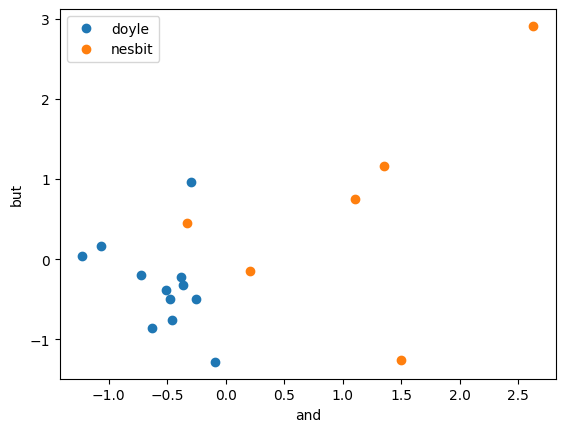

In [24]:
feat_x = 'and'
feat_y = 'but'

fig, ax = plt.subplots()
for label, group in lemma_z.groupby(authors):
    ax.plot(group[feat_x], group[feat_y], marker='o', ls='', label=label)
ax.set_xlabel(feat_x)
ax.set_ylabel(feat_y)
ax.legend()

In [25]:
pca_model = PCA(n_components=3)

In [26]:
pca = pd.DataFrame(
    pca_model.fit_transform(lemma_z),
    index = lemma_z.index,
    columns = ['PC1', 'PC2', 'PC3'],
)
display(pca)

PC1        PC2        PC3
author title                                                                 
doyle  a_case_of_identity                     -2.400032  -1.690620  -0.154264
       a_scandal_in_bohemia                   -2.808955   0.166337   0.325740
       the_adventure_of_the_beryl_coronet     -2.577907  -1.533624  -0.802248
       the_adventure_of_the_blue_carbuncle    -4.459899  -0.047288   1.674812
       the_adventure_of_the_copper_beeches    -2.761382  -0.567240   0.398945
       the_adventure_of_the_engineer’s_thumb  -1.828333  -0.251267   0.341872
       the_adventure_of_the_noble_bachelor    -3.291806  -1.949603  -0.569205
       the_adventure_of_the_speckled_band     -2.642520  -0.788374   0.023316
       the_boscombe_valley_mystery            -3.529472  -0.613324   1.720697
       the_five_orange_pips                   -4.343625   0.246262   0.923474
       the_man_with_the_twisted_lip           -3.595519   1.363466   0.281602
       the_red-headed_league                  -3.990408  -1.324376   1.004519
nesbit from_the_dead                           7.404877  -4.366296  -5.589728
       man-size_in_marble                      3.285759   0.569261  -0.050558
       the_ebony_frame                         5.140219   0.778707  -3.799154
       the_mass_for_the_dead                   7.077390  -2.365830  -5.438065
       the_mystery_of_the_semi-detached        3.493128  14.746795  -0.684480
       uncle_abraham’s_romance                11.828484  -2.372986  10.392725

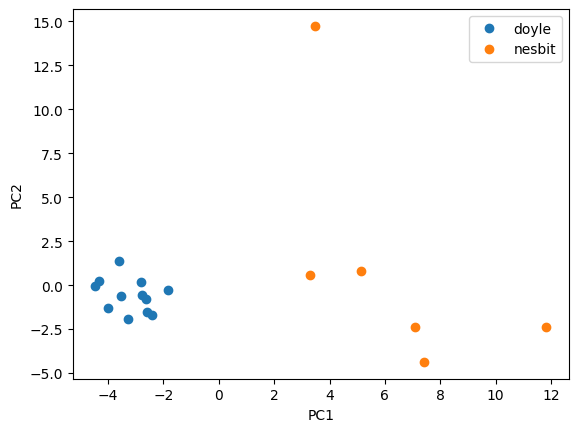

In [27]:
feat_x = 'PC1'
feat_y = 'PC2'

fig, ax = plt.subplots()
for label, group in pca.groupby(authors):
    ax.plot(group[feat_x], group[feat_y], marker='o', ls='', label=label)
ax.set_xlabel(feat_x)
ax.set_ylabel(feat_y)
ax.legend()